<a href="https://colab.research.google.com/github/ghost5053/python-capstone/blob/main/bike_sharing_demand_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CAPSTONE PROJECT- Bike Sharing Demand Prediction**

Author: Ashik Abraham Baby

# **1.Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#**2.Load  Dataset**


In [2]:
# Load the dataset
df = pd.read_csv("hour.csv")

# Display top 5 rows
df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#**3.Understand the Dataset**

In [3]:
df.shape


(17379, 17)

In [4]:
df.columns


Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [5]:
df.dtypes


,0
instant,int64
dteday,object
season,int64
yr,int64
mnth,int64
hr,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64


In [6]:
df.isnull().sum()


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [7]:
df.describe()


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#**4. Data Preprocessing**

**4.1. Check Missing Values**

In [8]:
# Check for missing values
df.isnull().sum()


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**4.2 Drop Unwanted Columns**

In [9]:
df.drop(['instant', 'casual', 'registered'], axis=1, inplace=True)


In [10]:
df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

**4.3 Convert Date Column to Date Format**

In [11]:
df['dteday'] = pd.to_datetime(df['dteday'])


**4.4 Rename Columns**

In [12]:
df.rename(columns={
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'weathersit': 'weather',
    'hum': 'humidity'
}, inplace=True)


**4.5 Verify Changes**

In [13]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   year        17379 non-null  int64         
 3   month       17379 non-null  int64         
 4   hour        17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  int64         
 7   workingday  17379 non-null  int64         
 8   weather     17379 non-null  int64         
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  humidity    17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(9)
memory usage: 1.9 MB


,dteday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


#**5. Exploratory Data Analysis(EDA)**

####**5.1 Univariate Analysis**

**5.1.1 Target Variable: cnt (Hourly Bike Rentals)**

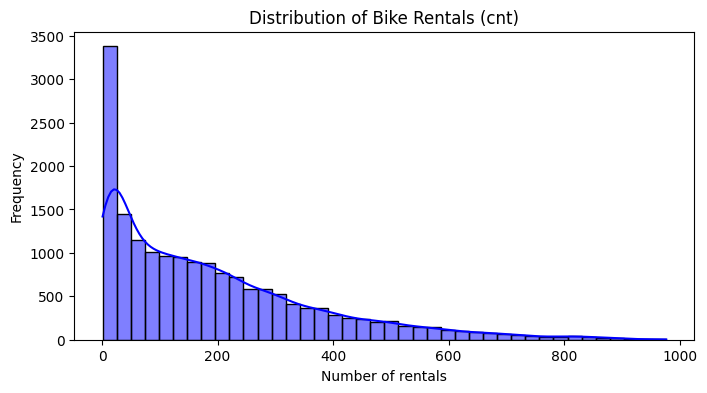

In [14]:
plt.figure(figsize=(8,4))
sns.histplot(df['cnt'], bins=40, kde=True, color='blue')
plt.title("Distribution of Bike Rentals (cnt)")
plt.xlabel("Number of rentals")
plt.ylabel("Frequency")
plt.show()


**5.1.2 Temperature (temp)**

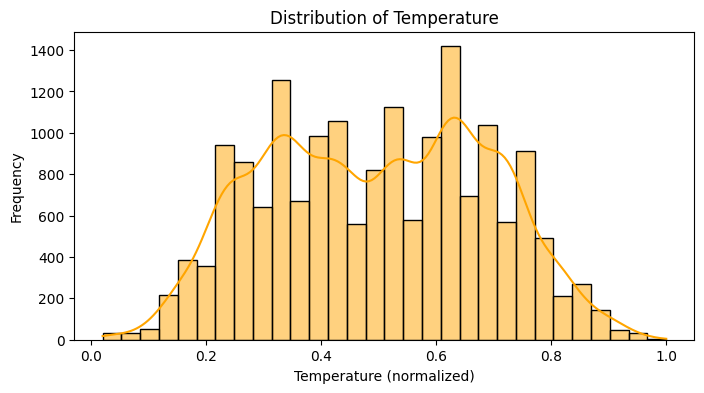

In [15]:
plt.figure(figsize=(8,4))
sns.histplot(df['temp'], bins=30, kde=True, color='orange')
plt.title("Distribution of Temperature")
plt.xlabel("Temperature (normalized)")
plt.ylabel("Frequency")
plt.show()


**5.1.3 Humidity**

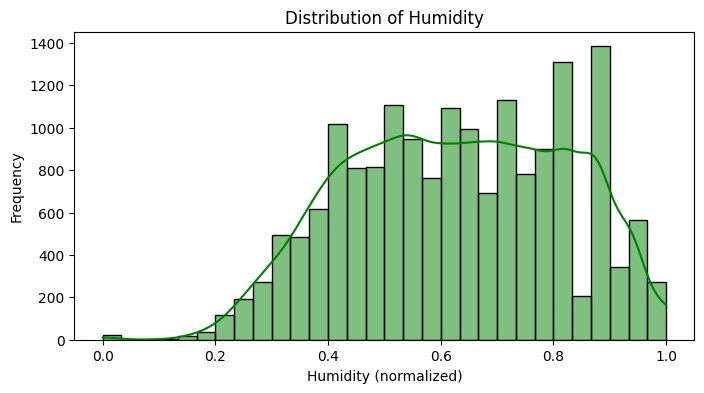

In [16]:
plt.figure(figsize=(8,4))
sns.histplot(df['humidity'], bins=30, kde=True, color='green')
plt.title("Distribution of Humidity")
plt.xlabel("Humidity (normalized)")
plt.ylabel("Frequency")
plt.show()


**5.1.4 Windspeed**

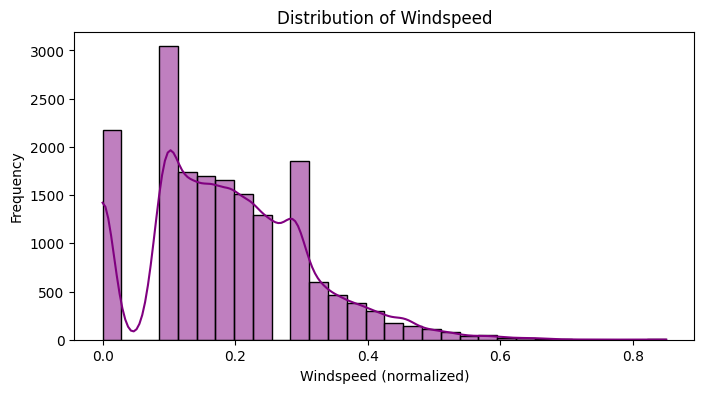

In [17]:
plt.figure(figsize=(8,4))
sns.histplot(df['windspeed'], bins=30, kde=True, color='purple')
plt.title("Distribution of Windspeed")
plt.xlabel("Windspeed (normalized)")
plt.ylabel("Frequency")
plt.show()


**5.1.5 Season**

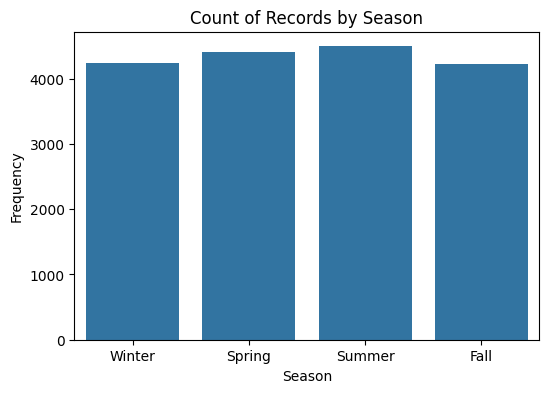

In [18]:
season_map = {1:"Winter", 2:"Spring", 3:"Summer", 4:"Fall"}
df['season_name'] = df['season'].map(season_map)

plt.figure(figsize=(6,4))
sns.countplot(x='season_name', data=df)
plt.title("Count of Records by Season")
plt.xlabel("Season")
plt.ylabel("Frequency")
plt.show()


**5.1.6 Weather Situation**

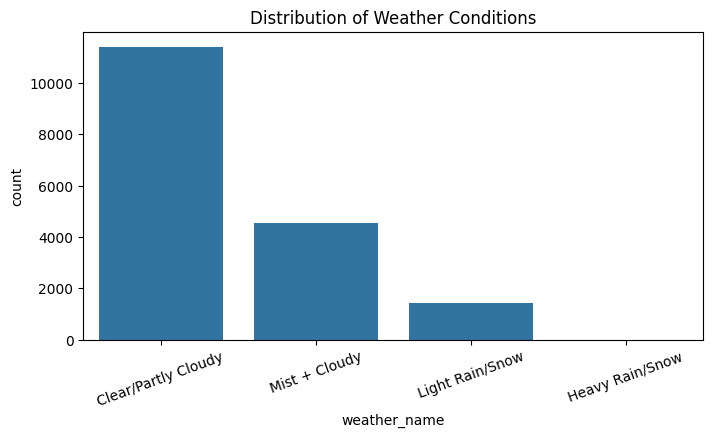

In [19]:
weather_map = {
    1:"Clear/Partly Cloudy",
    2:"Mist + Cloudy",
    3:"Light Rain/Snow",
    4:"Heavy Rain/Snow"
}
df['weather_name'] = df['weather'].map(weather_map)

plt.figure(figsize=(8,4))
sns.countplot(x='weather_name', data=df)
plt.title("Distribution of Weather Conditions")
plt.xticks(rotation=20)
plt.show()


**5.1.7 Hour of Day**

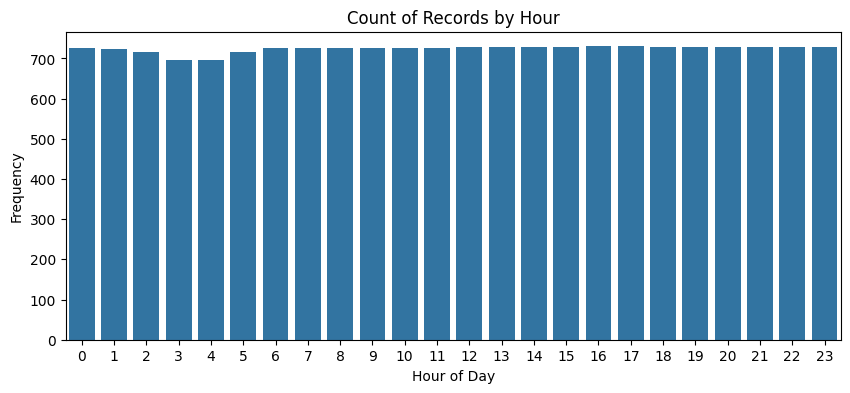

In [20]:
plt.figure(figsize=(10,4))
sns.countplot(x='hour', data=df)
plt.title("Count of Records by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Frequency")
plt.show()


####**5.2 Bivariate Analysis**

**5.2.1 Hour vs cnt**

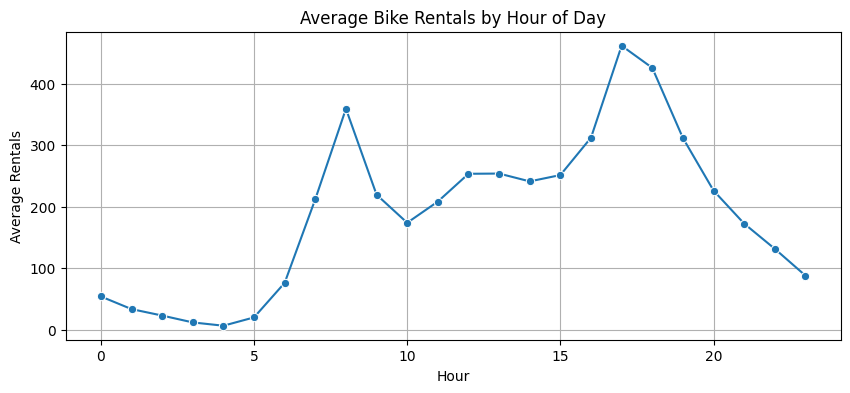

In [21]:
hourly_avg = df.groupby('hour')['cnt'].mean()

plt.figure(figsize=(10,4))
sns.lineplot(x=hourly_avg.index, y=hourly_avg.values, marker='o')
plt.title("Average Bike Rentals by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Average Rentals")
plt.grid(True)
plt.show()


**5.2.2 Weekday vs cnt**

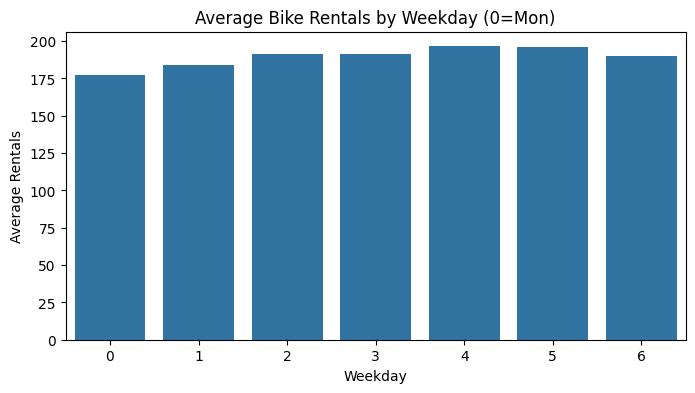

In [22]:
weekday_avg = df.groupby('weekday')['cnt'].mean()

plt.figure(figsize=(8,4))
sns.barplot(x=weekday_avg.index, y=weekday_avg.values)
plt.title("Average Bike Rentals by Weekday (0=Mon)")
plt.xlabel("Weekday")
plt.ylabel("Average Rentals")
plt.show()


**5.2.3 Month vs cnt**

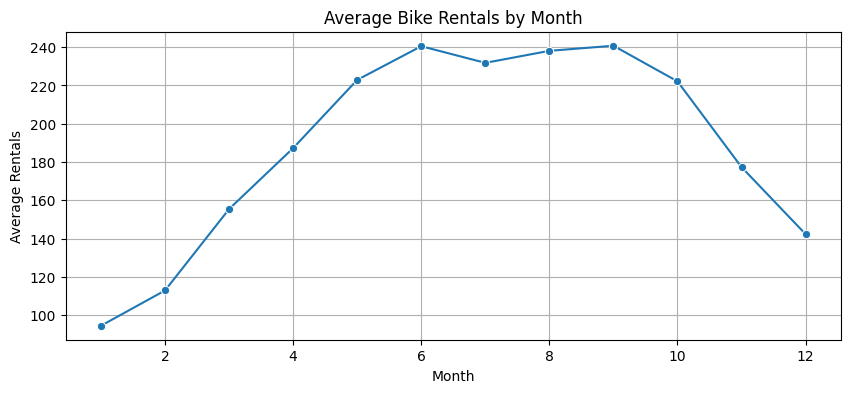

In [23]:
month_avg = df.groupby('month')['cnt'].mean()

plt.figure(figsize=(10,4))
sns.lineplot(x=month_avg.index, y=month_avg.values, marker='o')
plt.title("Average Bike Rentals by Month")
plt.xlabel("Month")
plt.ylabel("Average Rentals")
plt.grid(True)
plt.show()


**5.2.4 Season vs cnt**

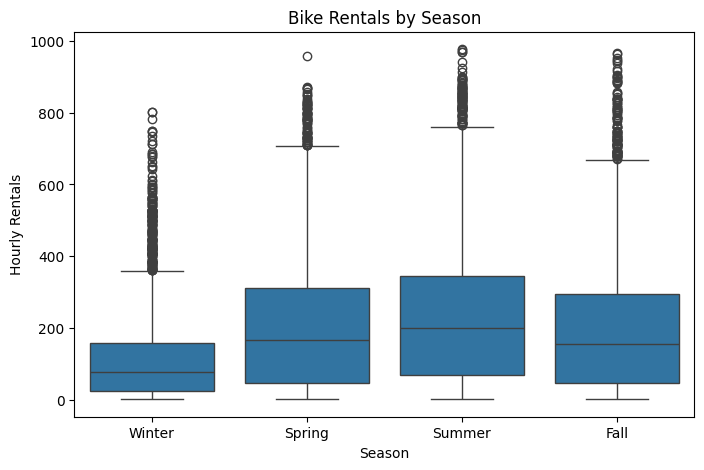

In [24]:
plt.figure(figsize=(8,5))
sns.boxplot(x='season_name', y='cnt', data=df, order=["Winter","Spring","Summer","Fall"])
plt.title("Bike Rentals by Season")
plt.xlabel("Season")
plt.ylabel("Hourly Rentals")
plt.show()


**5.2.5 Workingday vs cnt**

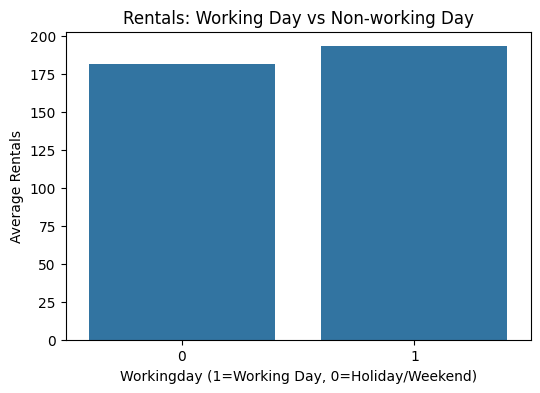

In [25]:
workday_avg = df.groupby('workingday')['cnt'].mean()

plt.figure(figsize=(6,4))
sns.barplot(x=workday_avg.index, y=workday_avg.values)
plt.title("Rentals: Working Day vs Non-working Day")
plt.xlabel("Workingday (1=Working Day, 0=Holiday/Weekend)")
plt.ylabel("Average Rentals")
plt.show()


**5.2.6 Weather vs cnt**

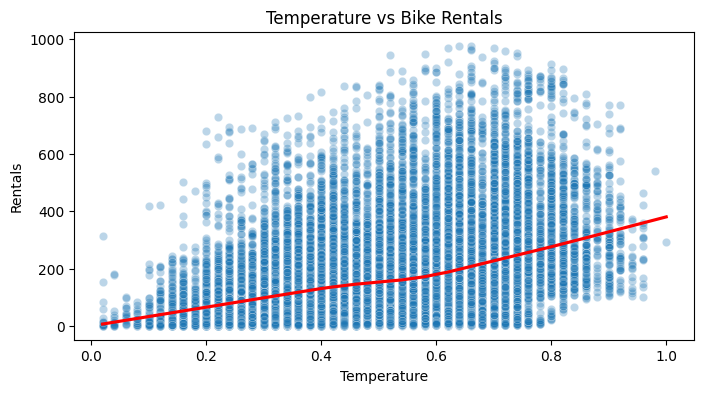

In [26]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='temp', y='cnt', data=df, alpha=0.3)
sns.regplot(x='temp', y='cnt', data=df, scatter=False, lowess=True, color='red')
plt.title("Temperature vs Bike Rentals")
plt.xlabel("Temperature")
plt.ylabel("Rentals")
plt.show()


**5.2.8 Humidity vs cnt**

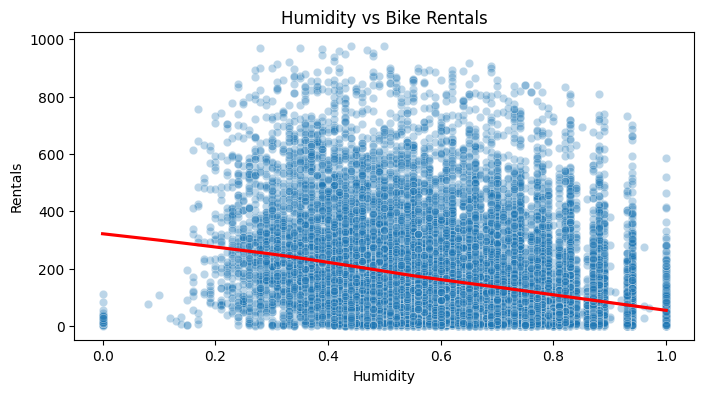

In [27]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='humidity', y='cnt', data=df, alpha=0.3)
sns.regplot(x='humidity', y='cnt', data=df, scatter=False, lowess=True, color='red')
plt.title("Humidity vs Bike Rentals")
plt.xlabel("Humidity")
plt.ylabel("Rentals")
plt.show()


####**5.3 Multivariate Analysis**

**5.3.1 Correlation Heatmap**

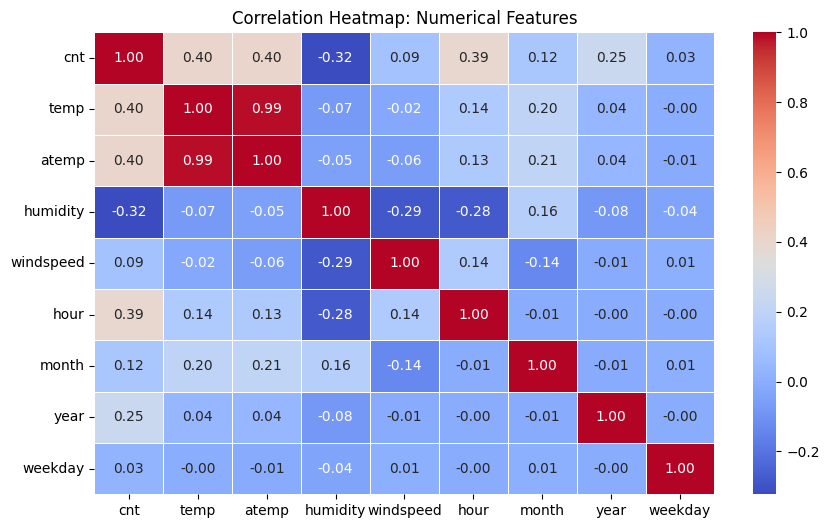

In [28]:
plt.figure(figsize=(10, 6))
numeric_cols = ['cnt','temp','atemp','humidity','windspeed','hour','month','year','weekday']
corr = df[numeric_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap: Numerical Features")
plt.show()


**5.3.2 Boxplots: Combined Effect of Categorical + Numerical Features**

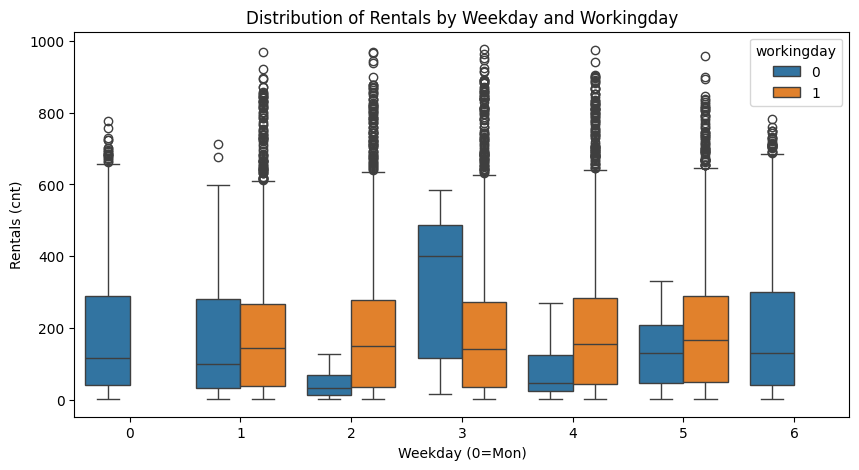

In [29]:
plt.figure(figsize=(10,5))
sns.boxplot(x='weekday', y='cnt', hue='workingday', data=df)
plt.title("Distribution of Rentals by Weekday and Workingday")
plt.xlabel("Weekday (0=Mon)")
plt.ylabel("Rentals (cnt)")
plt.show()


**5.3.3 Combined Weather & Hour Pattern (Heatmap)**

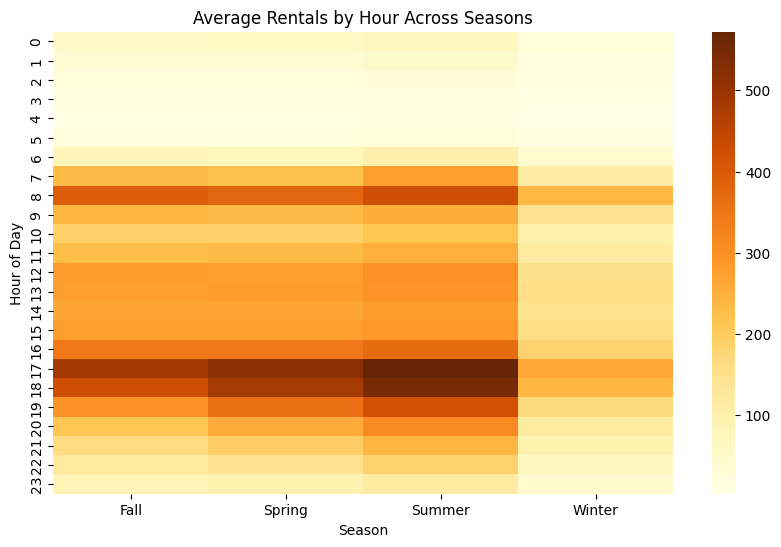

In [30]:
hour_temp = df.pivot_table(values='cnt', index='hour', columns='season_name', aggfunc='mean')

plt.figure(figsize=(10,6))
sns.heatmap(hour_temp, cmap='YlOrBr', annot=False)
plt.title("Average Rentals by Hour Across Seasons")
plt.xlabel("Season")
plt.ylabel("Hour of Day")
plt.show()


####**5.4 Time-Series Analysis**

**5.4.1 Trend Over Time (Daily Rentals)**

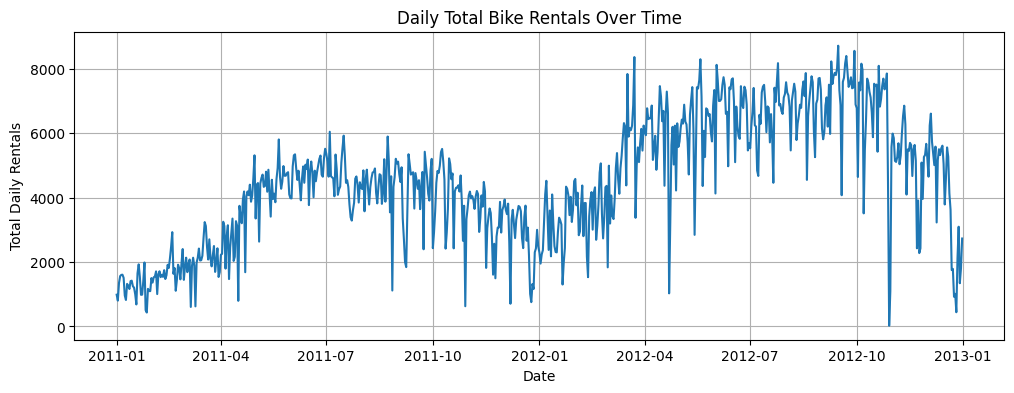

In [31]:
df['dteday'] = pd.to_datetime(df['dteday'])
daily = df.groupby('dteday')['cnt'].sum()

plt.figure(figsize=(12,4))
sns.lineplot(x=daily.index, y=daily.values)
plt.title("Daily Total Bike Rentals Over Time")
plt.xlabel("Date")
plt.ylabel("Total Daily Rentals")
plt.grid(True)
plt.show()


**5.4.2 7-Day Rolling Average (Smooth Trend)**

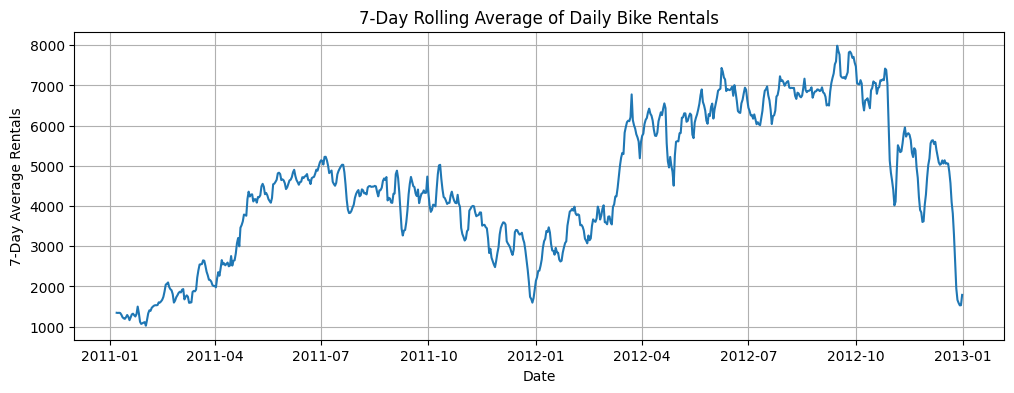

In [32]:
rolling = daily.rolling(window=7).mean()

plt.figure(figsize=(12,4))
sns.lineplot(x=rolling.index, y=rolling.values)
plt.title("7-Day Rolling Average of Daily Bike Rentals")
plt.xlabel("Date")
plt.ylabel("7-Day Average Rentals")
plt.grid(True)
plt.show()


**5.4.3 Average Rentals by Hour (24-hour cycle)**

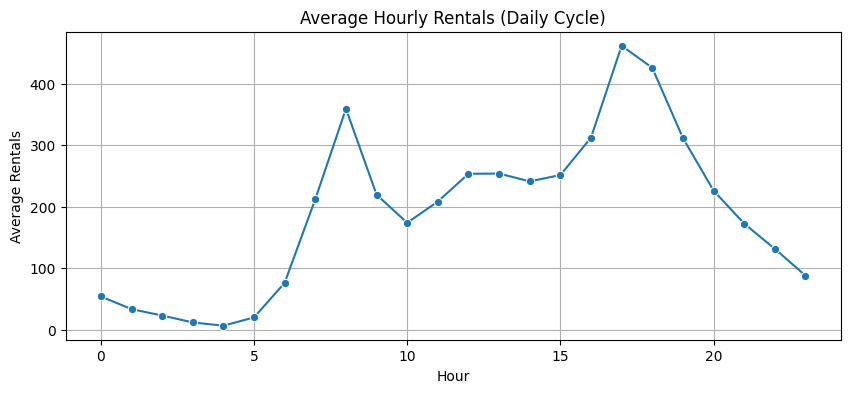

In [33]:
hour_avg = df.groupby('hour')['cnt'].mean()

plt.figure(figsize=(10,4))
sns.lineplot(x=hour_avg.index, y=hour_avg.values, marker='o')
plt.title("Average Hourly Rentals (Daily Cycle)")
plt.xlabel("Hour")
plt.ylabel("Average Rentals")
plt.grid(True)
plt.show()


**5.4.4 Average Rentals by Weekday (Weekly Cycle)**

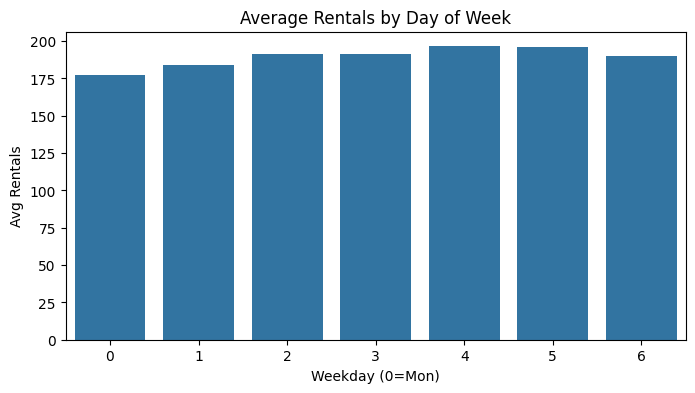

In [34]:
weekday_avg = df.groupby('weekday')['cnt'].mean()

plt.figure(figsize=(8,4))
sns.barplot(x=weekday_avg.index, y=weekday_avg.values)
plt.title("Average Rentals by Day of Week")
plt.xlabel("Weekday (0=Mon)")
plt.ylabel("Avg Rentals")
plt.show()


**5.4.5 Average Rentals by Month (Yearly Cycle)**

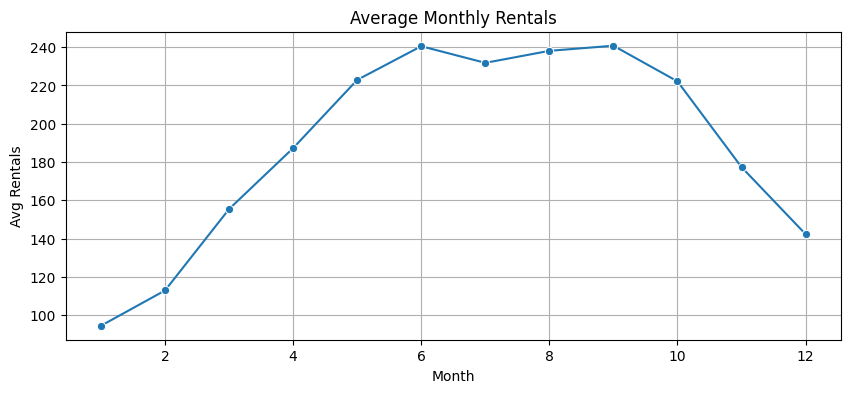

In [35]:
month_avg = df.groupby('month')['cnt'].mean()

plt.figure(figsize=(10,4))
sns.lineplot(x=month_avg.index, y=month_avg.values, marker='o')
plt.title("Average Monthly Rentals")
plt.xlabel("Month")
plt.ylabel("Avg Rentals")
plt.grid(True)
plt.show()


#**6. Feature Engineering**

**6.1 Date–Time Based Features**

In [36]:
# Extract day, weekday, weekend
df['day'] = df['dteday'].dt.day
df['weekday'] = df['dteday'].dt.weekday     # Monday = 0
df['is_weekend'] = df['weekday'].isin([5,6]).astype(int)


**6.2 Cyclical Features (Hour + Month)**

In [37]:
# Hour cyclical transformation
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)

# Month cyclical transformation
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)


**6.3 Peak-Hour Flags**

In [38]:
df['is_morning_peak'] = df['hour'].between(7, 9).astype(int)
df['is_evening_peak'] = df['hour'].between(16, 19).astype(int)

df['is_peak'] = ((df['is_morning_peak'] == 1) |
                 (df['is_evening_peak'] == 1)).astype(int)


**6.4 Weather Interaction Features**

In [39]:
df['temp_humidity'] = df['temp'] * df['humidity']
df['temp_windspeed'] = df['temp'] * df['windspeed']
df['atemp_diff'] = df['atemp'] - df['temp']


**6.5 Target Transformation**

In [40]:
df['log_cnt'] = np.log1p(df['cnt'])   # log(1 + cnt)


In [41]:
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   dteday           17379 non-null  datetime64[ns]
 1   season           17379 non-null  int64         
 2   year             17379 non-null  int64         
 3   month            17379 non-null  int64         
 4   hour             17379 non-null  int64         
 5   holiday          17379 non-null  int64         
 6   weekday          17379 non-null  int32         
 7   workingday       17379 non-null  int64         
 8   weather          17379 non-null  int64         
 9   temp             17379 non-null  float64       
 10  atemp            17379 non-null  float64       
 11  humidity         17379 non-null  float64       
 12  windspeed        17379 non-null  float64       
 13  cnt              17379 non-null  int64         
 14  season_name      17379 non-null  objec

#**7. Model Building**

**7.1. Feature Selection**

In [42]:

# Target variable
y = df['cnt']
drop_cols = [
    'dteday',        # raw date not needed
    'season_name',   # categorical text (used only for EDA)
    'weather_name',  # categorical text (used only for EDA)
    'log_cnt',       # transformed target, not an input feature
    'atemp'          # highly correlated with temp → avoid multicollinearity
]

# Create final feature matrix X
X = df.drop(columns = drop_cols + ['cnt'])   # drop target column also

# Display final feature set structure
print("Final features shape:", X.shape)
print("Final selected features:\n", X.columns.tolist())


Final features shape: (17379, 23)
Final selected features:
 ['season', 'year', 'month', 'hour', 'holiday', 'weekday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed', 'day', 'is_weekend', 'hour_sin', 'hour_cos', 'month_sin', 'month_cos', 'is_morning_peak', 'is_evening_peak', 'is_peak', 'temp_humidity', 'temp_windspeed', 'atemp_diff']


**7.2. Train–Test Split**

In [43]:
from sklearn.model_selection import train_test_split

# X and y are already created in 7.1
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (13903, 23)
Testing set shape: (3476, 23)


####**7.3. Model Training**

**7.3.1. Linear Regression**

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Linear Regression model with scaling
lr_model = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LinearRegression())
])

# Train the model
lr_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_lr = lr_model.predict(X_test)

print("Linear Regression model trained successfully!")


Linear Regression model trained successfully!


**7.3.2. Random Forest Regressor**

In [45]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest with 200 trees
rf_model = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

# Train the model
rf_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_rf = rf_model.predict(X_test)

print("Random Forest model trained successfully!")


Random Forest model trained successfully!


**7.3.3. XGBoost Regressor**

In [46]:
try:
    from xgboost import XGBRegressor
    xgb_available = True
except:
    xgb_available = False
    print("XGBoost is not installed. Skipping XGBoost model.")

if xgb_available:
    xgb_model = XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        objective='reg:squarederror'
    )

    # Train model
    xgb_model.fit(X_train, y_train)

    # Predictions
    y_pred_xgb = xgb_model.predict(X_test)

    print("XGBoost model trained successfully!")


XGBoost model trained successfully!


####**7.4 Evaluation Metrics**

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def eval_model(name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    r2   = r2_score(y_true, y_pred)

    print(f"----- {name} -----")
    print(f"RMSE: {rmse:.3f}")
    print(f"MAE : {mae:.3f}")
    print(f"R²  : {r2:.3f}")
    print()

    return {"Model": name, "RMSE": rmse, "MAE": mae, "R2": r2}


**7.4.1. Evaluate Linear Regression**

In [48]:
lr_results = eval_model("Linear Regression", y_test, y_pred_lr)


----- Linear Regression -----
RMSE: 107.996
MAE : 80.192
R²  : 0.632



**7.4.2.Evaluate Random Forest**

In [49]:
rf_results = eval_model("Random Forest", y_test, y_pred_rf)


----- Random Forest -----
RMSE: 41.890
MAE : 24.850
R²  : 0.945



**7.4.3. Evaluate XGBoost**

In [50]:
if 'y_pred_xgb' in globals():
    xgb_results = eval_model("XGBoost", y_test, y_pred_xgb)
else:
    print("XGBoost model was not trained.")


----- XGBoost -----
RMSE: 36.827
MAE : 22.700
R²  : 0.957



**Comparison Table**

In [51]:
import pandas as pd

results = [lr_results, rf_results]

if 'xgb_results' in globals():
    results.append(xgb_results)

results_df = pd.DataFrame(results)
print("Model Comparison Table:")
display(results_df)


Model Comparison Table:


,Model,RMSE,MAE,R2
0,Linear Regression,107.995670,80.192446,0.631678
1,Random Forest,41.889644,24.849777,0.944585
2,XGBoost,36.826788,22.699656,0.957171


**Feature Importance**

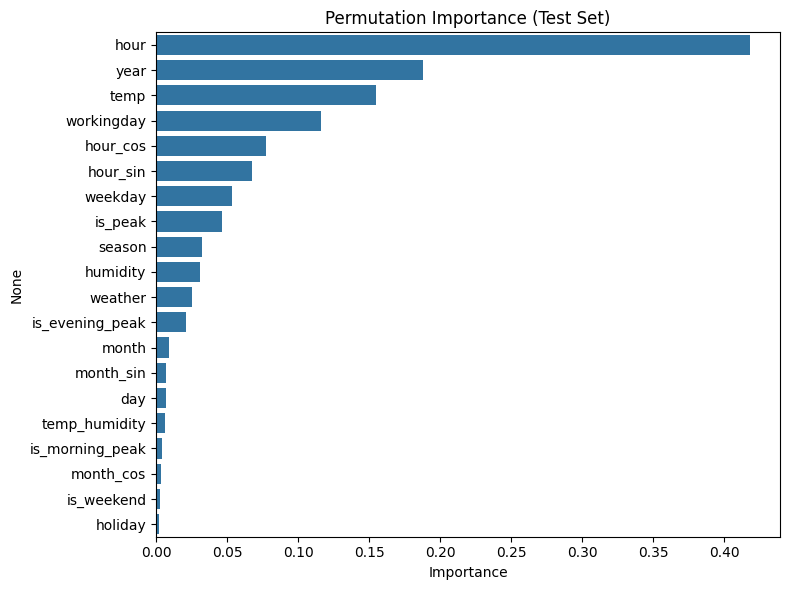

,0
hour,0.418485
year,0.188164
temp,0.154939
workingday,0.115924
hour_cos,0.077395
hour_sin,0.067503
weekday,0.053397
is_peak,0.046363
season,0.032149
humidity,0.030680


In [53]:
# Choose the model you want for permutation importance
# Prefer XGBoost if available
model = xgb_model    # <-- use this if xgb_model exists

# If you want RandomForest instead, uncomment:
# model = rf_model

# If you used RandomizedSearchCV and got best_rf, uncomment:
# model = best_rf


from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

perm = permutation_importance(
    model,
    X_test,
    y_test,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

perm_imp = pd.Series(perm.importances_mean, index=X_test.columns).sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=perm_imp.head(20).values, y=perm_imp.head(20).index)
plt.title("Permutation Importance (Test Set)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

perm_imp.head(20)


**RESIDUAL ANALYSIS**

In [54]:
# Select the best model's predictions
if 'y_pred_xgb' in globals():
    best_pred = y_pred_xgb
    best_model_name = "XGBoost"
elif 'y_pred_rf_best' in globals():
    best_pred = y_pred_rf_best
    best_model_name = "RandomForest (tuned)"
else:
    best_pred = y_pred_rf
    best_model_name = "RandomForest"

best_pred[:10]


array([418.90408  , 102.545975 ,   4.5521154, 564.7929   ,  10.783749 ,
        25.9807   , 702.438    ,  50.32925  ,  10.479158 ,  25.861767 ],
      dtype=float32)

In [55]:
# Residuals
residuals = y_test - best_pred
residuals[:10]


,cnt
12830,6.095917
8688,-14.545975
7091,-0.552115
12230,-38.792908
431,2.216251
1086,6.019300
11605,3.562012
7983,-24.329250
10391,-8.479158
7046,-4.861767


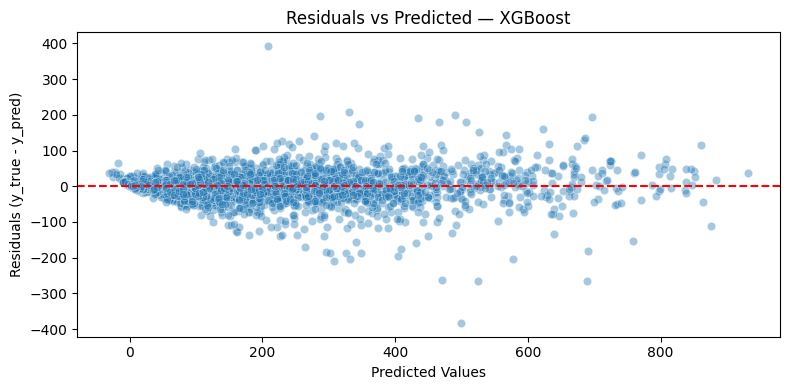

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.scatterplot(x=best_pred, y=residuals, alpha=0.4)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (y_true - y_pred)")
plt.title(f"Residuals vs Predicted — {best_model_name}")
plt.tight_layout()
plt.show()


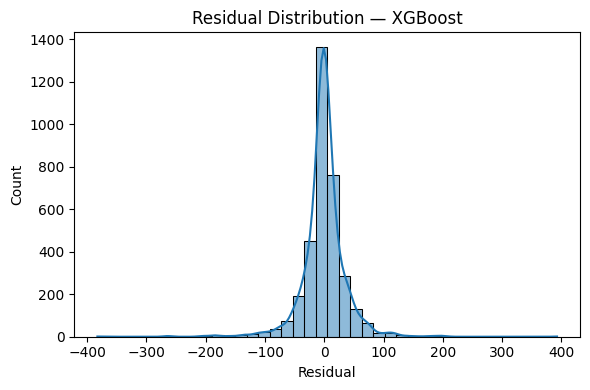

In [57]:
plt.figure(figsize=(6,4))
sns.histplot(residuals, bins=40, kde=True)
plt.title(f"Residual Distribution — {best_model_name}")
plt.xlabel("Residual")
plt.tight_layout()
plt.show()


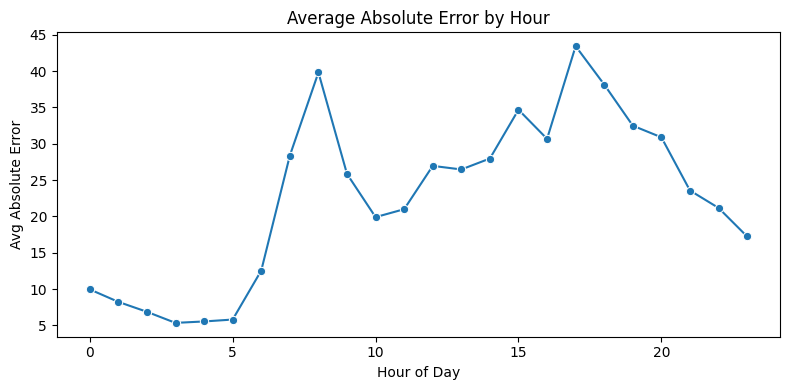

,abs_err
hour,
0,9.953945
1,8.235194
2,6.868948
3,5.344366
4,5.541964
5,5.803836
6,12.544773
7,28.364294
8,39.810750


In [58]:
# Combine test data + results into one dataframe
test_df = X_test.copy()
test_df['y_true'] = y_test
test_df['y_pred'] = best_pred
test_df['abs_err'] = abs(test_df['y_true'] - test_df['y_pred'])

hour_error = test_df.groupby('hour')['abs_err'].mean()

plt.figure(figsize=(8,4))
sns.lineplot(x=hour_error.index, y=hour_error.values, marker='o')
plt.title("Average Absolute Error by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Avg Absolute Error")
plt.tight_layout()
plt.show()

hour_error


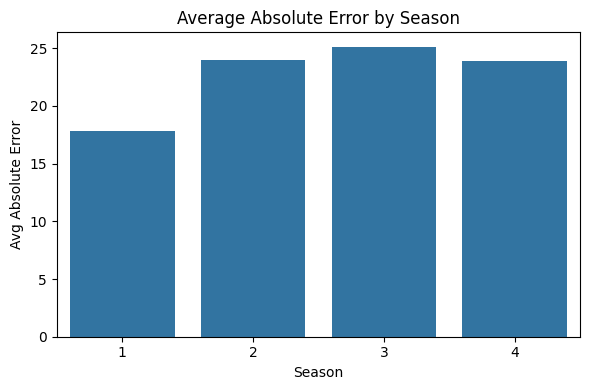

In [59]:
if 'season' in test_df.columns:
    season_error = test_df.groupby('season')['abs_err'].mean()
    plt.figure(figsize=(6,4))
    sns.barplot(x=season_error.index, y=season_error.values)
    plt.title("Average Absolute Error by Season")
    plt.xlabel("Season")
    plt.ylabel("Avg Absolute Error")
    plt.tight_layout()
    plt.show()

    season_error


**Save the Best Model**

In [60]:
# Select the best performing model
if 'xgb_model' in globals():
    best_model = xgb_model
    print("Best model selected: XGBoost")
elif 'best_rf' in globals():
    best_model = best_rf
    print("Best model selected: Tuned Random Forest")
else:
    best_model = rf_model
    print("Best model selected: Random Forest")


Best model selected: XGBoost


In [61]:
import joblib

joblib.dump(best_model, "best_model.joblib")
print("Model saved successfully as best_model.joblib")


Model saved successfully as best_model.joblib


In [62]:
import joblib

model = joblib.load("best_model.joblib")
print("Model loaded successfully!")


Model loaded successfully!


In [63]:
pred = model.predict(X_test[:5])
pred


array([418.90408  , 102.545975 ,   4.5521154, 564.7929   ,  10.783749 ],
      dtype=float32)